In [1]:
import pandas as pd
enrolments = pd.read_csv("enrolments_dataset\\Enrolments_altered.csv")
enrolments.head()

,term_desc,Year,Emplid,academic_organization_desc,subject,Catalog_Nbr,course_id,class_nbr,ssr_component,Primary_Component_Ind,Enrollment_Capacity,Total_Over_Capacity,Instruction_Mode_Desc,Instructor_Role
0,Winter,2018,0,Dept of Biological Sciences,BIOL,243,161577,11947,LAB,N,24,1.000000,In Person,NaN
1,Fall,2021,959240,Dept of Biological Sciences,CMMB,443,105376,77119,LAB,N,1,1.000000,Web-Based Instruction,AL
2,Summer,2021,0,Dept of Physics & Astronomy,PHYS,223,132698,50250,LAB,N,26,0.538462,Web-Based Instruction,NaN
3,Fall,2018,4238070,Department of Geoscience,GLGY,601,122334,73164,LAB,N,2,1.000000,In Person,PI
4,Winter,2018,30024875,Dept of Math & Stats,MATH,249,125996,10031,LAB,N,35,0.771429,In Person,PI


In [2]:
enrolments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16112 entries, 0 to 16111
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   term_desc                   16112 non-null  object 
 1   Year                        16112 non-null  int64  
 2   Emplid                      16112 non-null  int64  
 3   academic_organization_desc  16112 non-null  object 
 4   subject                     16112 non-null  object 
 5   Catalog_Nbr                 16112 non-null  object 
 6   course_id                   16112 non-null  int64  
 7   class_nbr                   16112 non-null  int64  
 8   ssr_component               16112 non-null  object 
 9   Primary_Component_Ind       16112 non-null  object 
 10  Enrollment_Capacity         16112 non-null  int64  
 11  Total_Over_Capacity         16112 non-null  float64
 12  Instruction_Mode_Desc       16112 non-null  object 
 13  Instructor_Role             936

In [3]:
enrolments.describe()

,Year,Emplid,course_id,class_nbr,Enrollment_Capacity,Total_Over_Capacity
count,16112.000000,1.611200e+04,16112.000000,16112.000000,16112.000000,16112.000000
mean,2019.472815,5.613964e+06,134908.800708,43000.435452,42.599677,0.927457
std,1.509535,8.129064e+06,24294.129471,28588.302153,64.876753,0.991683
min,2017.000000,0.000000e+00,100089.000000,1017.000000,1.000000,0.025000
25%,2018.000000,0.000000e+00,106019.000000,13467.250000,16.000000,0.781818
50%,2019.000000,4.025467e+06,132819.000000,31181.500000,24.000000,0.960000
75%,2021.000000,1.003600e+07,161618.000000,71637.250000,36.000000,1.000000
max,2022.000000,3.015554e+07,165302.000000,77468.000000,1000.000000,28.000000


In [5]:
y = enrolments[['Total_Over_Capacity']]
X = enrolments.loc[:, enrolments.columns != 'Total_Over_Capacity']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, stratify = X['academic_organization_desc'])

In [7]:
X_train.shape, X_test.shape

((9667, 13), (6445, 13))

In [8]:
X_train = pd.get_dummies(data = X_train, columns = ['term_desc', 'academic_organization_desc', 'ssr_component',
                                                    'Primary_Component_Ind', 'subject', 'Instruction_Mode_Desc', 'Instructor_Role'])
X_train['Catalog_Nbr'] = X_train['Catalog_Nbr'].str.extract(pat = '(\d+)', expand = False)
X_train.reset_index(inplace = True)
X_train

,index,Year,Emplid,Catalog_Nbr,course_id,class_nbr,Enrollment_Capacity,term_desc_Fall,term_desc_Spring,term_desc_Summer,...,Instruction_Mode_Desc_Independent Research,Instruction_Mode_Desc_Independent Study,Instruction_Mode_Desc_Internship,Instruction_Mode_Desc_Practicum,Instruction_Mode_Desc_Senior Project,Instruction_Mode_Desc_Web-Based Instruction,Instructor_Role_AL,Instructor_Role_PI,Instructor_Role_SI,Instructor_Role_TA
0,303,2018,10000379,528,162805,16838,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,8795,2022,4187001,501,163978,13624,32,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1276,2018,10141212,201,122140,70943,18,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,11676,2020,30072868,205,162564,20584,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,14306,2019,0,211,161157,71228,14,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9662,3500,2021,0,243,161577,11425,24,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9663,5501,2018,0,402,163269,30640,30,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9664,13178,2018,0,201,104793,71217,20,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9665,11740,2018,0,501,150311,50894,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9667 entries, 0 to 9666
Data columns (total 71 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   index                                                      9667 non-null   int64 
 1   Year                                                       9667 non-null   int64 
 2   Emplid                                                     9667 non-null   int64 
 3   Catalog_Nbr                                                9667 non-null   object
 4   course_id                                                  9667 non-null   int64 
 5   class_nbr                                                  9667 non-null   int64 
 6   Enrollment_Capacity                                        9667 non-null   int64 
 7   term_desc_Fall                                             9667 non-null   uint8 
 8   term_desc_Spring  

In [10]:
# X_train['Emplid'] = X_train['Emplid'].fillna(0)
# X_train['Catalog_Nbr'] = X_train['Catalog_Nbr'].fillna(0)
X_train['Catalog_Nbr'] = X_train['Catalog_Nbr'].apply(pd.to_numeric)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9667 entries, 0 to 9666
Data columns (total 71 columns):
 #   Column                                                     Non-Null Count  Dtype
---  ------                                                     --------------  -----
 0   index                                                      9667 non-null   int64
 1   Year                                                       9667 non-null   int64
 2   Emplid                                                     9667 non-null   int64
 3   Catalog_Nbr                                                9667 non-null   int64
 4   course_id                                                  9667 non-null   int64
 5   class_nbr                                                  9667 non-null   int64
 6   Enrollment_Capacity                                        9667 non-null   int64
 7   term_desc_Fall                                             9667 non-null   uint8
 8   term_desc_Spring            

In [11]:
X_test = pd.get_dummies(data = X_test, columns = ['term_desc', 'academic_organization_desc', 'ssr_component',
                                                  'Primary_Component_Ind', 'subject', 'Instruction_Mode_Desc', 'Instructor_Role'])
X_test['Catalog_Nbr'] = X_test['Catalog_Nbr'].str.extract(pat = '(\d+)', expand = False)
X_test.reset_index(inplace = True)
X_test

,index,Year,Emplid,Catalog_Nbr,course_id,class_nbr,Enrollment_Capacity,term_desc_Fall,term_desc_Spring,term_desc_Summer,...,Instruction_Mode_Desc_Independent Research,Instruction_Mode_Desc_Independent Study,Instruction_Mode_Desc_Internship,Instruction_Mode_Desc_Practicum,Instruction_Mode_Desc_Senior Project,Instruction_Mode_Desc_Web-Based Instruction,Instructor_Role_AL,Instructor_Role_PI,Instructor_Role_SI,Instructor_Role_TA
0,2585,2020,4135148,528,150494,76333,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,14897,2019,4202951,507,150052,16565,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,9332,2019,0,365,162994,72806,24,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10071,2018,985073,691,161413,11542,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3303,2018,0,265,162782,72617,60,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,15881,2019,0,203,104794,73840,20,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6441,377,2018,4195535,528,150053,16645,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6442,13320,2019,0,203,104794,71135,20,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6443,3296,2020,0,311,136324,70680,15,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9667 entries, 0 to 9666
Data columns (total 71 columns):
 #   Column                                                     Non-Null Count  Dtype
---  ------                                                     --------------  -----
 0   index                                                      9667 non-null   int64
 1   Year                                                       9667 non-null   int64
 2   Emplid                                                     9667 non-null   int64
 3   Catalog_Nbr                                                9667 non-null   int64
 4   course_id                                                  9667 non-null   int64
 5   class_nbr                                                  9667 non-null   int64
 6   Enrollment_Capacity                                        9667 non-null   int64
 7   term_desc_Fall                                             9667 non-null   uint8
 8   term_desc_Spring            

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
model = regressor.fit(X_train, y_train)

In [14]:
model.score(X_test, y_test)

0.6478895345718809

In [15]:
model.score(X_train, y_train)

1.0

In [16]:
y_test_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_test_pred)

0.14574673571574862

[Text(0.5, 0.8333333333333334, 'Enrollment_Capacity <= 1.5\nsquared_error = 0.916\nsamples = 9667\nvalue = 0.924'),
 Text(0.25, 0.5, 'Instruction_Mode_Desc_In Person <= 0.5\nsquared_error = 7.895\nsamples = 955\nvalue = 1.788'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'Catalog_Nbr <= 501.5\nsquared_error = 0.061\nsamples = 8712\nvalue = 0.83'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

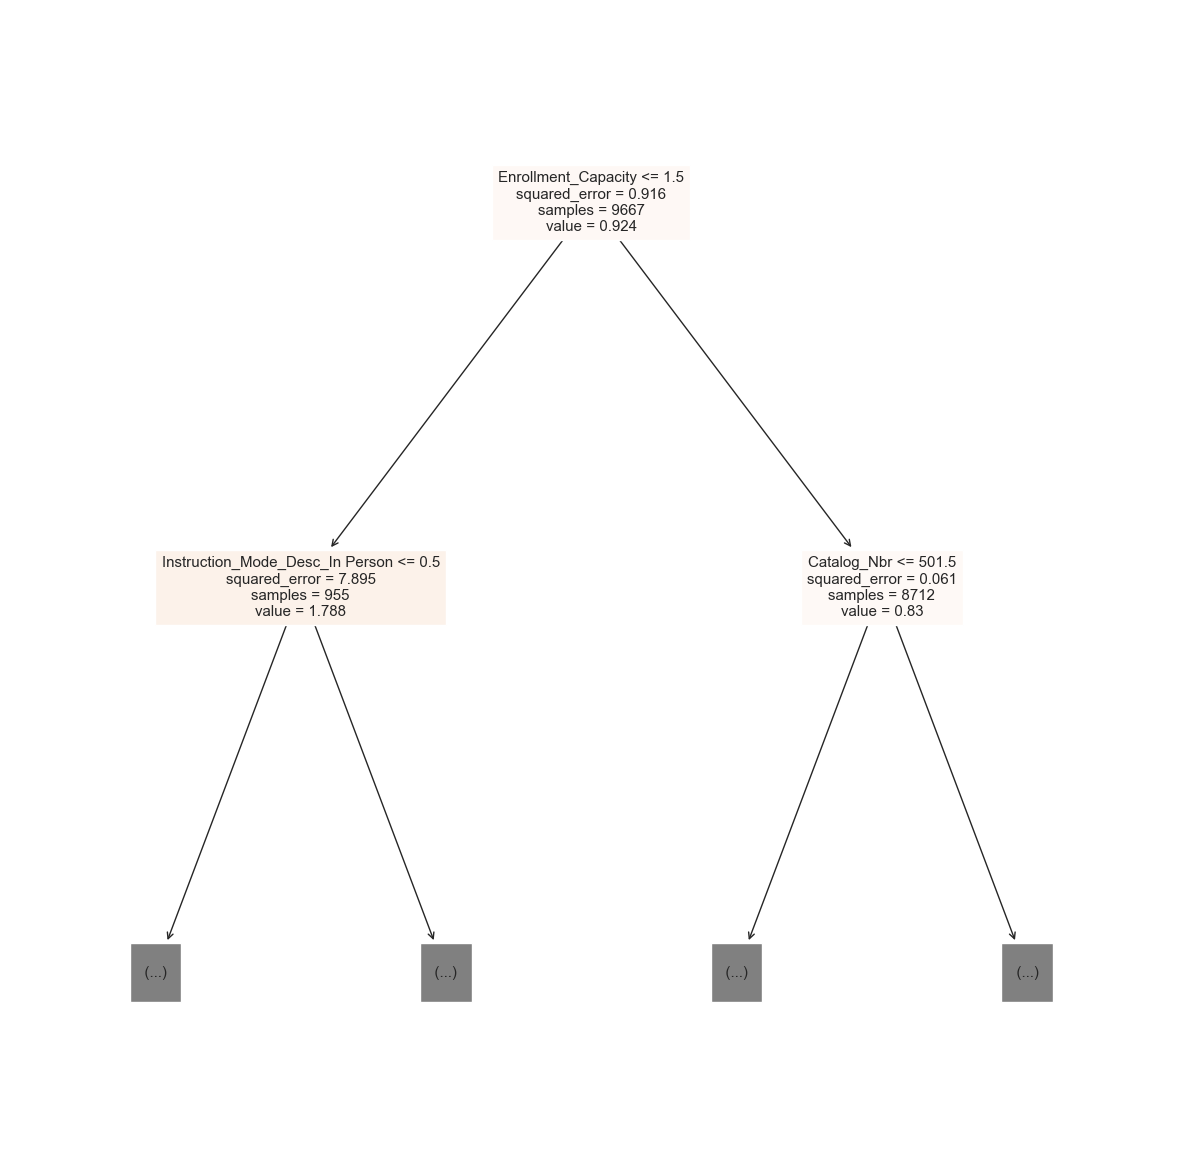

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model, feature_names = list(X_train.columns), filled = True, max_depth = 1)

In [20]:
importance = model.feature_importances_
importance

array([2.60727733e-02, 6.65314693e-03, 1.14030381e-02, 1.11161884e-01,
       4.46402192e-02, 1.37760130e-01, 9.42964053e-02, 5.81579349e-04,
       4.52206643e-04, 8.46900176e-03, 4.27743399e-04, 2.32270792e-07,
       3.48847689e-04, 1.40730425e-04, 3.51483497e-04, 2.86787051e-04,
       0.00000000e+00, 1.29786119e-04, 1.51524821e-03, 0.00000000e+00,
       2.11294866e-04, 2.22146754e-05, 2.40767225e-04, 2.55560218e-04,
       3.80285634e-04, 1.31969633e-04, 9.03687403e-06, 6.60241636e-04,
       7.21921461e-05, 7.61380348e-06, 9.83872598e-09, 4.00516466e-07,
       4.45754525e-04, 1.02649288e-03, 0.00000000e+00, 2.45752015e-04,
       1.56782791e-08, 3.41893704e-01, 1.83833950e-04, 2.90957364e-06,
       4.44575846e-03, 0.00000000e+00, 1.86951351e-04, 2.39394985e-04,
       3.88203077e-05, 3.37042779e-04, 0.00000000e+00, 4.35363909e-04,
       2.56074198e-04, 3.87283495e-05, 4.76945632e-04, 1.38833945e-06,
       6.72590780e-05, 1.35675884e-04, 5.57845994e-07, 1.58229583e-04,
      

In [23]:
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
list(ccp_alphas)

[0.0,
 5.742334874444794e-20,
 6.316568361889273e-20,
 6.890801849333753e-20,
 6.890801849333753e-20,
 6.890801849333753e-20,
 6.890801849333753e-20,
 6.890801849333753e-20,
 6.890801849333753e-20,
 6.890801849333753e-20,
 9.187735799111672e-20,
 9.187735799111672e-20,
 9.187735799111672e-20,
 9.187735799111672e-20,
 9.187735799111672e-20,
 9.761969286556151e-20,
 1.033620277400063e-19,
 1.1484669748889588e-19,
 1.1484669748889588e-19,
 1.263313672377855e-19,
 1.3781603698667505e-19,
 1.3781603698667505e-19,
 1.3781603698667505e-19,
 1.6078537648445423e-19,
 1.6078537648445423e-19,
 1.7227004623334384e-19,
 1.837547159822334e-19,
 1.837547159822334e-19,
 1.8375471598223343e-19,
 1.8375471598223343e-19,
 1.8375471598223343e-19,
 2.067240554800126e-19,
 2.2969339497779176e-19,
 2.2969339497779176e-19,
 2.4117806472668137e-19,
 2.5266273447557093e-19,
 3.2300633668751968e-19,
 3.4454009246668764e-19,
 3.6750943196446686e-19,
 3.6750943196446686e-19,
 3.938882827939476e-19,
 4.134481109600

In [25]:
ccp_alphas = ccp_alphas[:-1]
list(ccp_alphas[-100:])

[7.152135494148704e-05,
 7.289800962201613e-05,
 7.398770034266057e-05,
 7.433509203256801e-05,
 7.474749096476119e-05,
 7.486784305665498e-05,
 7.501189714135596e-05,
 7.609378091427655e-05,
 7.758353160235853e-05,
 7.758353160235853e-05,
 7.781354179489707e-05,
 7.875021821975554e-05,
 7.999505537555909e-05,
 8.055963548505402e-05,
 8.082476513578596e-05,
 8.201206500042828e-05,
 8.383371371593955e-05,
 8.443351875277606e-05,
 8.466802398995006e-05,
 8.828260067212366e-05,
 8.91442702396989e-05,
 9.191338617421186e-05,
 9.222262629058025e-05,
 9.466494780388559e-05,
 9.654839488293501e-05,
 9.705206044318933e-05,
 9.80396519892652e-05,
 9.82286719395086e-05,
 9.969252563313742e-05,
 9.986741401069076e-05,
 0.00010135702825865827,
 0.00010759973794006409,
 0.0001088361873218485,
 0.00011022999372317817,
 0.00011038776177992905,
 0.00011141204117308424,
 0.00011169249044127227,
 0.00011269885044090135,
 0.00011472325558480371,
 0.00011953303801296171,
 0.00012295301860408992,
 0.000126

In [ ]:
train_scores, test_scores = [], []
for alpha in ccp_alphas: